In [1]:
import numpy as np
import matplotlib as mpl

In [3]:
## creacion de arreglos
edad = np.array([17, 18, 18, 19, 20,
                 21, 21, 40, 41, 42,
                 42, 43, 44, 44, 45,
                 50, 54, 60, 61, 67,
                 67, 68, 76, 79, 83])

estudio = np.array([6, 6, 7, 7, 8,
                    8, 9, 10, 10, 10,
                    11, 11, 11, 11, 12,
                    14, 16, 16, 16, 16,
                    16, 17, 19, 19, 22])

ingreso = np.array([11230, 9624, 13798, 3215, 19169,
                    14982, 15419, 17286, 14232, 18092,
                    18318, 16260, 22347, 16710, 28949,
                    27309, 32779, 29743, 30341, 34088,
                    32435, 33909, 32263, 42067, 42295])

In [4]:
datos = np.stack((edad, estudio, ingreso), axis=1)

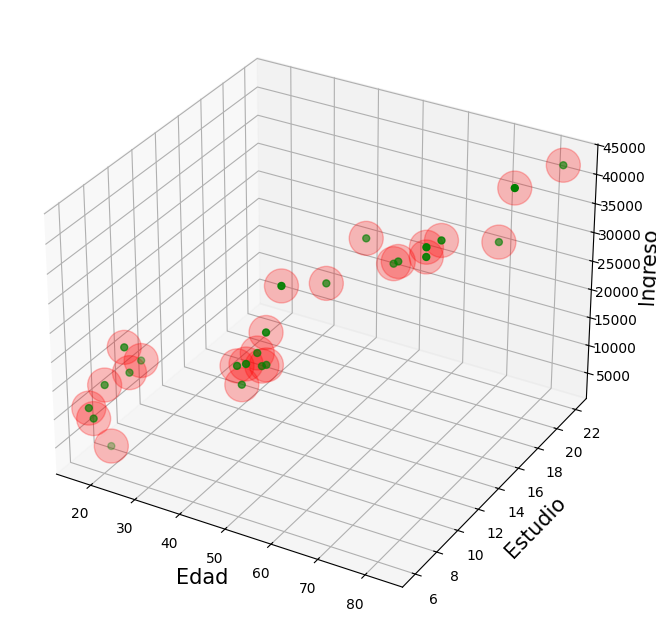

In [10]:
### muestra de informacion
img = mpl.pyplot.figure(figsize=(10, 8))
ax = img.add_subplot(1, 1, 1, projection='3d')
ax.scatter(datos.T[0], datos.T[1], datos.T[2], marker='o', c= 'Red', s= 600, alpha = 0.25)
ax.scatter(datos.T[0], datos.T[1], datos.T[2], marker='.', c= 'Green', s= 100)

ax.set_xlabel('Edad', fontsize = 15, color= 'Black')
ax.set_ylabel('Estudio', fontsize = 15, color= 'Black')
ax.set_zlabel('Ingreso' , fontsize = 15, color= 'Black')
img.show()

In [12]:
from sklearn import preprocessing

In [13]:
escalador = preprocessing.MinMaxScaler()
escalados = escalador.fit_transform(datos)

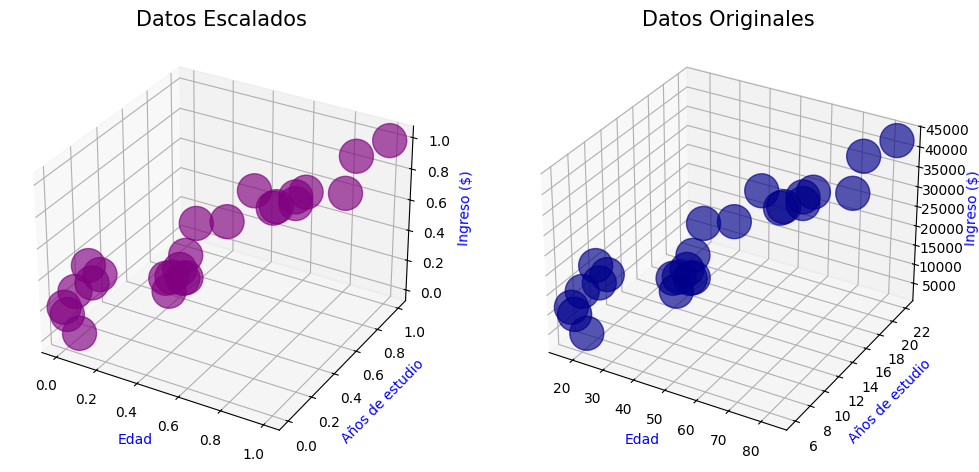

In [19]:
fig = mpl.pyplot.figure(figsize=(12, 12))

ax = fig.add_subplot(1, 2, 1, projection="3d")

ax.scatter(escalados.T[0],
           escalados.T[1],
           escalados.T[2],
           marker="o", c="purple", s=600, alpha=0.65)

ax.set_title("Datos Escalados", fontsize=15)
ax.set_xlabel("Edad", fontsize=10, color="blue")
ax.set_ylabel("Años de estudio", fontsize=10, color="blue")
ax.set_zlabel("Ingreso ($)", fontsize=10, color="blue")

ax = fig.add_subplot(1, 2, 2, projection="3d")

ax.scatter(datos.T[0],
           datos.T[1],
           datos.T[2],
           marker="o", c="darkblue", s=600, alpha=0.65)

ax.set_title("Datos Originales", fontsize=15)
ax.set_xlabel("Edad", fontsize=10, color="blue")
ax.set_ylabel("Años de estudio", fontsize=10, color="blue")
ax.set_zlabel("Ingreso ($)", fontsize=10, color="blue")



mpl.pyplot.show()

#originales = escalados


In [20]:
escalados

array([[0.        , 0.        , 0.20509212],
       [0.01515152, 0.        , 0.16399693],
       [0.01515152, 0.0625    , 0.27080348],
       [0.03030303, 0.0625    , 0.        ],
       [0.04545455, 0.125     , 0.40823951],
       [0.06060606, 0.125     , 0.30110031],
       [0.06060606, 0.1875    , 0.3122825 ],
       [0.34848485, 0.25      , 0.36005629],
       [0.36363636, 0.25      , 0.2819089 ],
       [0.37878788, 0.25      , 0.38068066],
       [0.37878788, 0.3125    , 0.38646366],
       [0.39393939, 0.3125    , 0.33380246],
       [0.40909091, 0.3125    , 0.48955988],
       [0.40909091, 0.3125    , 0.3453173 ],
       [0.42424242, 0.375     , 0.65849539],
       [0.5       , 0.5       , 0.61653019],
       [0.56060606, 0.625     , 0.75649949],
       [0.65151515, 0.625     , 0.67881269],
       [0.66666667, 0.625     , 0.69411464],
       [0.75757576, 0.625     , 0.78999488],
       [0.75757576, 0.625     , 0.74769703],
       [0.77272727, 0.6875    , 0.78541453],
       [0.

In [22]:
## valores faltantes
faltantes = escalados.copy()

faltantes[[3,4, 15, 17, 24], 2] = np.nan
faltantes

array([[0.        , 0.        , 0.20509212],
       [0.01515152, 0.        , 0.16399693],
       [0.01515152, 0.0625    , 0.27080348],
       [0.03030303, 0.0625    ,        nan],
       [0.04545455, 0.125     ,        nan],
       [0.06060606, 0.125     , 0.30110031],
       [0.06060606, 0.1875    , 0.3122825 ],
       [0.34848485, 0.25      , 0.36005629],
       [0.36363636, 0.25      , 0.2819089 ],
       [0.37878788, 0.25      , 0.38068066],
       [0.37878788, 0.3125    , 0.38646366],
       [0.39393939, 0.3125    , 0.33380246],
       [0.40909091, 0.3125    , 0.48955988],
       [0.40909091, 0.3125    , 0.3453173 ],
       [0.42424242, 0.375     , 0.65849539],
       [0.5       , 0.5       ,        nan],
       [0.56060606, 0.625     , 0.75649949],
       [0.65151515, 0.625     ,        nan],
       [0.66666667, 0.625     , 0.69411464],
       [0.75757576, 0.625     , 0.78999488],
       [0.75757576, 0.625     , 0.74769703],
       [0.77272727, 0.6875    , 0.78541453],
       [0.

In [23]:
## importe de knn
from sklearn.impute import KNNImputer


In [31]:
Imputacion = KNNImputer(n_neighbors=5, weights="uniform")

In [32]:
uniforme = Imputacion.fit_transform(faltantes)

In [33]:
Imputacion = KNNImputer(n_neighbors=5, weights="distance")
distancia  = Imputacion.fit_transform(faltantes)

In [34]:
valores = np.stack((uniforme, distancia), axis=1)

In [35]:
valores

array([[[0.        , 0.        , 0.20509212],
        [0.        , 0.        , 0.20509212]],

       [[0.01515152, 0.        , 0.16399693],
        [0.01515152, 0.        , 0.16399693]],

       [[0.01515152, 0.0625    , 0.27080348],
        [0.01515152, 0.0625    , 0.27080348]],

       [[0.03030303, 0.0625    , 0.25065507],
        [0.03030303, 0.0625    , 0.25515671]],

       [[0.04545455, 0.125     , 0.25065507],
        [0.04545455, 0.125     , 0.28267093]],

       [[0.06060606, 0.125     , 0.30110031],
        [0.06060606, 0.125     , 0.30110031]],

       [[0.06060606, 0.1875    , 0.3122825 ],
        [0.06060606, 0.1875    , 0.3122825 ]],

       [[0.34848485, 0.25      , 0.36005629],
        [0.34848485, 0.25      , 0.36005629]],

       [[0.36363636, 0.25      , 0.2819089 ],
        [0.36363636, 0.25      , 0.2819089 ]],

       [[0.37878788, 0.25      , 0.38068066],
        [0.37878788, 0.25      , 0.38068066]],

       [[0.37878788, 0.3125    , 0.38646366],
        [0.378

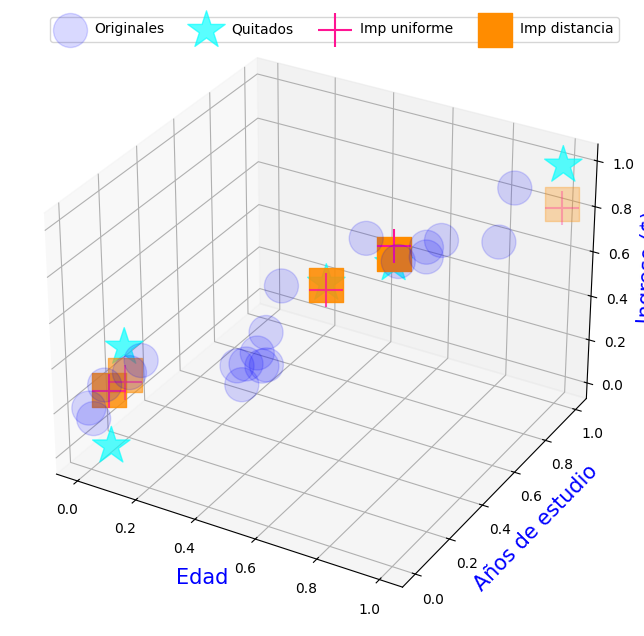

In [37]:
fig = mpl.pyplot.figure(figsize=(8, 8))

filtro = ~np.isnan(faltantes.T[2])

ax = fig.add_subplot(1, 1, 1, projection="3d")

ax.scatter(escalados.T[0][filtro],
           escalados.T[1][filtro],
           escalados.T[2][filtro],
           label="Originales",
           marker="o", c="blue", s=600, alpha=0.15)

ax.scatter(escalados.T[0][~filtro],
           escalados.T[1][~filtro],
           escalados.T[2][~filtro],
           label="Quitados",
           marker="*", c="cyan", s=800, alpha=0.65)

ax.scatter(uniforme.T[0][~filtro],
           uniforme.T[1][~filtro],
           uniforme.T[2][~filtro],
           label="Imp uniforme",
           marker="+", c="deeppink", s=600)

ax.scatter(distancia.T[0][~filtro],
           distancia.T[1][~filtro],
           distancia.T[2][~filtro],
           label="Imp distancia",
           marker="s", c="darkorange", s=600)

ax.set_xlabel("Edad", fontsize=15, color="blue")
ax.set_ylabel("Años de estudio", fontsize=15, color="blue")
ax.set_zlabel("Ingreso ($)", fontsize=15, color="blue")
ax.legend(ncol=4)

mpl.pyplot.show()
